# Lesson 3: Numerical aspects of optimal transport: Theory and Practice

Recall that, given two probability distributions $\mu$ and $\nu$ on $\mathbb{R}^d$, and a cost function 
$$ c: \mathbb{R}^d \times \mathbb{R}^d \rightarrow \mathbb{R}$$
then the Kantorovich problem is about computing the infimum:
$$
   \inf_{\pi \in \Pi(\mu, \nu)} \int_{\mathbb{R}^d} c(x,y) \pi(dx, dy)
$$
where $\Pi(\mu, \nu)$ is the set of all couplings between with marginals $\mu$ and $\nu$.

In its discrete form, by taking empirical measures on $n$ points i.e:
$$ \mu = \frac{1}{n} \sum_{i=1}^n \delta_{x_i} \ ,$$
$$ \nu = \frac{1}{n} \sum_{i=1}^n \delta_{y_i} \ ,$$
and assuming that the optimum is given by a Brenier map $\sigma: \{1, \dots, n\} \rightarrow \{1, \dots, n\}$, we recover the so-called matching problem:
$$ \inf_{\sigma \in \Sigma_n} \sum_{i} c_{i, \sigma(i)} $$

# I. One dimensional transport

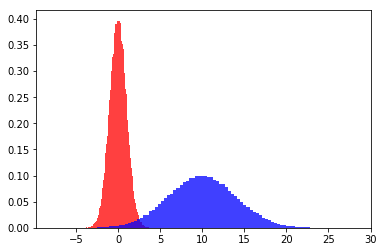

In [64]:
import numpy as np
import matplotlib.pyplot as plt

N=[100000, 100000]
mu = np.random.normal(0,  1, N[0])
nu = np.random.normal(10, 4, N[1])

n, bins, patches = plt.hist(mu, 100, density=True, facecolor='r', alpha=0.75)
n, bins, patches = plt.hist(nu, 100, density=True, facecolor='b', alpha=0.75)

In [2]:
import time
start = time.time()
    
# Compute the Brenier map via quantile matching
mu_sorted = sorted(mu)
nu_sorted = sorted(nu)
T = [ (mu_sorted[i], nu_sorted[i]) for i in range(1, N[0]) ]

end = time.time()
print("Computing time for Brenier map via quantile matching: \n %f ms \n" % ((end - start)*1000) )

Computing time for Brenier map via quantile matching: 
 179.961920 ms 



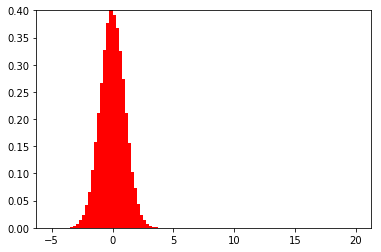

In [3]:
from matplotlib import animation, rc
from IPython.display import HTML

number_of_frames = 50
nbins = 100
xmin=-5
xmax=20

def update_hist(i):
    # Compute McCann interpolation via Brenier map
    sample = [ x+ (y-x)*i*1.0/number_of_frames for (x,y) in T]
    color = ( 1-i*1.0/number_of_frames, 0.0, i*1.0/number_of_frames)
    #Form histogram
    plt.cla()
    plt.hist( sample, color=color, bins=nbins, range=(xmin, xmax), density=True)
    plt.ylim( 0, 0.4)

fig = plt.figure()
hist = plt.hist( mu, color='b', bins=nbins, range=(xmin, xmax), density=True)
plt.ylim( 0, 0.4)

animation = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=None)
plt.clf
HTML(animation.to_html5_video())

Exercice:
If $\mu = \mathcal{N}( m_1, \sigma_1 )$ and $\nu = \mathcal{N}( m_2, \sigma_2 )$, then prove that the geodesic in Wasserstein space is:
$$ \mu_t = \mathcal{N}( m_t, \sigma_t )$$
with
$$ m_t = (1-t) m_1 + t m_2 \ ,$$
$$ \sigma_t = (1-t) \sigma_1 + t \sigma_2 \ .$$

## II. The Hungarian algorithm

Resources:
- Wikipedia page:
https://en.wikipedia.org/wiki/Hungarian_algorithm
- A tutorial for programming the Hungarian algorithm:
http://csclab.murraystate.edu/~bob.pilgrim/445/munkres.html
- Installation instructions:
http://software.clapper.org/munkres/

Word of warning: The Hungarian has a $\mathcal{O}(n^3)$ complexity, which is problematic for more than 1000 points!

In [60]:
#The example from class - This is also the example by Clapper, the author of the package
from munkres import Munkres, print_matrix

matrix = [[5, 9, 1],
          [10, 3, 2],
          [8, 7, 4]]
m = Munkres()
indexes = m.compute(matrix)
print_matrix(matrix, msg='Lowest cost through this matrix:')
total = 0
for row, column in indexes:
    value = matrix[row][column]
    total += value
    print(f'({row}, {column}) -> {value}')
print('total cost: {%f}'%total)

Lowest cost through this matrix:
[ 5,  9,  1]
[10,  3,  2]
[ 8,  7,  4]
(0, 2) -> 1
(1, 1) -> 3
(2, 0) -> 8
total cost: {12.000000}


In [63]:
matrix = [[1, 4, 5],
          [5, 7, 6],
          [5, 8, 8]]
m = Munkres()
indexes = m.compute(matrix)
print_matrix(matrix, msg='Lowest cost through this matrix:')
total = 0
for row, column in indexes:
    value = matrix[row][column]
    total += value
    print(f'({row}, {column}) -> {value}')
print('total cost: {%f}'%total)

Lowest cost through this matrix:
[1, 4, 5]
[5, 7, 6]
[5, 8, 8]
(0, 0) -> 1
(1, 2) -> 6
(2, 1) -> 8
total cost: {15.000000}


## II.1. Comparison to 1D

Cost matrix
$$ C_{i,j} = \| x_i - y_j\|^2 = \|x_i\|^2 + \|y_j\|^2 - 2 \langle x_i, y_j \rangle \ .$$

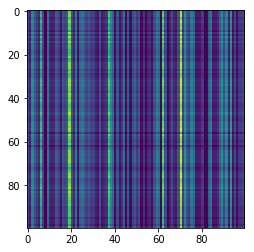

In [61]:
n = 100    # Warning: Limit to 100 samples as Hungarian algorithm is cubic
x = mu[:n]
y = nu[:n] 
C = np.transpose( np.tile(x**2,(len(x),1)) ) + np.tile(y**2,(len(y),1)) - 2*np.dot(x.reshape(n,1),y.reshape(1,n))
plt.clf
plt.imshow(C);

In [62]:
import time
start = time.time()
    
# Compute the Brenier map via the Hungarian algorithm
#The example from class
from munkres import Munkres, print_matrix

m = Munkres()
indexes = m.compute(C.tolist())

end = time.time()
print("Computing time for Brenier map via the Hungarian algorithm: \n %f ms \n" % ((end - start)*1000) )

total = 0
for row, column in indexes:
    value = C[row][column]
    total += value
    print(f'({row}, {column}) -> {value}')
print('total cost: {%f}'%total)

Computing time for Brenier map via the Hungarian algorithm: 
 43587.922096 ms 

(0, 30) -> 97.42022565110729
(1, 71) -> 93.37991533463625
(2, 92) -> 53.6021590879908
(3, 75) -> 182.03560044087715
(4, 98) -> 94.56791628699565
(5, 23) -> 38.17829660282651
(6, 51) -> 119.91588978218769
(7, 24) -> 145.40011257396387
(8, 14) -> 102.53660494366446
(9, 37) -> 275.338106517158
(10, 54) -> 20.433204802736235
(11, 72) -> 204.8781302874781
(12, 96) -> 27.876683135245365
(13, 76) -> 151.9853056633004
(14, 45) -> 19.873974162744616
(15, 9) -> 175.73332575159392
(16, 17) -> 102.90034477236233
(17, 63) -> 120.3565810069904
(18, 91) -> 203.01493879784184
(19, 2) -> 205.41546323929154
(20, 39) -> 151.68821154234297
(21, 35) -> 60.549425131244746
(22, 89) -> 201.78171965204194
(23, 49) -> 135.85374090182486
(24, 68) -> 48.3021235349404
(25, 11) -> 53.546605457283476
(26, 86) -> 48.66451406871216
(27, 59) -> 182.295391794531
(28, 36) -> 81.7722606746605
(29, 38) -> 205.20171450012333
(30, 28) -> 127.5720

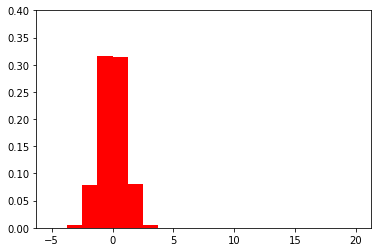

In [11]:
# Visual check
from matplotlib import animation, rc
from IPython.display import HTML

number_of_frames = 50
nbins = 20
xmin=-5
xmax=20

def update_hist(i):
    # Compute McCann interpolation via Brenier map
    sample = [ x+ (y-x)*i*1.0/number_of_frames for (x,y) in T]
    color = ( 1-i*1.0/number_of_frames, 0.0, i*1.0/number_of_frames)
    #Form histogram
    plt.cla()
    plt.hist( sample, color=color, bins=nbins, range=(xmin, xmax), density=True)
    plt.ylim( 0, 0.4)

fig = plt.figure()
hist = plt.hist( mu, color='b', bins=nbins, range=(xmin, xmax), density=True)
plt.ylim( 0, 0.4)

animation = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=None)
plt.clf
HTML(animation.to_html5_video())

## II.2. In two dimensions

In two dimensions, quantile matching does not work anymore. But the Hungarian algorithm still works!

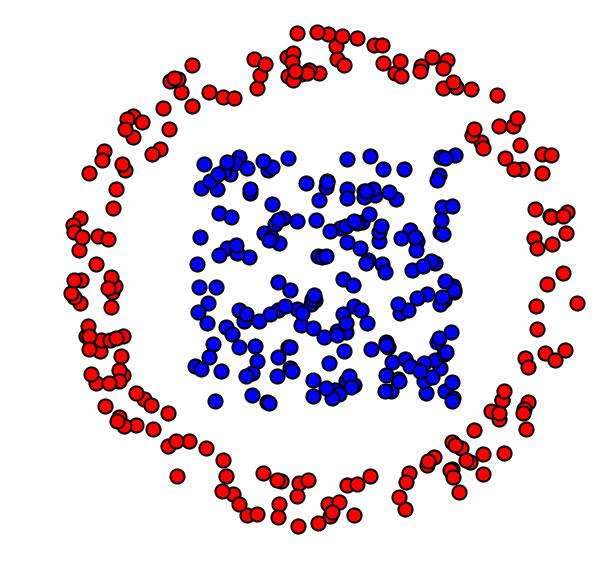

In [16]:
N=(200, 200)
# Point cloud x, of n points inside a square.
x = np.random.rand(2,N[0])-.5
# Point cloud y, of n points inside an anulus.
theta = 2*np.pi*np.random.rand(1,N[1])
r = .8 + .2*np.random.rand(1,N[1])
y = np.vstack((np.cos(theta)*r,np.sin(theta)*r))
# Shortcut for displaying point clouds.
plotp = lambda x,col: plt.scatter(x[0,:], x[1,:], s=200, edgecolors="k", c=col, linewidths=2)
#Display of the two clouds.
plt.figure(figsize=(10,10))

plotp(x, 'b')
plotp(y, 'r')

plt.axis("off")
plt.xlim(np.min(y[0,:])-.1,np.max(y[0,:])+.1)
plt.ylim(np.min(y[1,:])-.1,np.max(y[1,:])+.1)

plt.show()

Cost matrix
$$ C_{i,j} = \| x_i - y_j\|^2 = \|x_i\|^2 + \|y_j\|^2 - 2 \langle x_i, y_j \rangle \ .$$

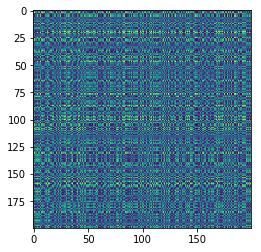

In [18]:
x2 = np.sum(x**2,0)
y2 = np.sum(y**2,0)
C = np.tile(y2,(N[0],1)) + np.tile(x2[:,np.newaxis],(1,N[1])) - 2*np.dot(np.transpose(x),y)
plt.clf
plt.imshow(C);

In [19]:
import time
start = time.time()
    
# Compute the Brenier map via the Hungarian algorithm
#The example from class
from munkres import Munkres, print_matrix

m = Munkres()
indexes = m.compute(C.tolist())

end = time.time()
print("Computing time for Brenier map via the Hungarian algorithm: \n %f ms \n" % ((end - start)*1000) )

Computing time for Brenier map via the Hungarian algorithm: 
 44983.338594 ms 



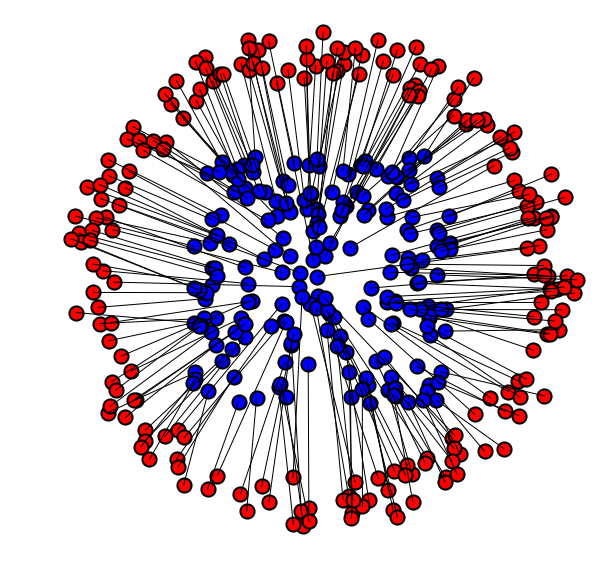

In [15]:
plt.figure(figsize=(10,10))

plotp(x, 'b')
plotp(y, 'r')

i = [ i for (i,j) in indexes]
j = [ j for (i,j) in indexes]
plt.plot([x[0,i],y[0,j]],[x[1,i],y[1,j]],'k',lw = 1)

#A = P * (P > np.max(P)*.2)
#i,j = np.where(A != 0)
#plt.plot([x[0,i],y[0,j]],[x[1,i],y[1,j]],'k:',lw = 1)

plt.axis("off")
plt.xlim(np.min(y[0,:])-.1,np.max(y[0,:])+.1)
plt.ylim(np.min(y[1,:])-.1,np.max(y[1,:])+.1)

plt.show()

# III. Sinkhorn algorithm


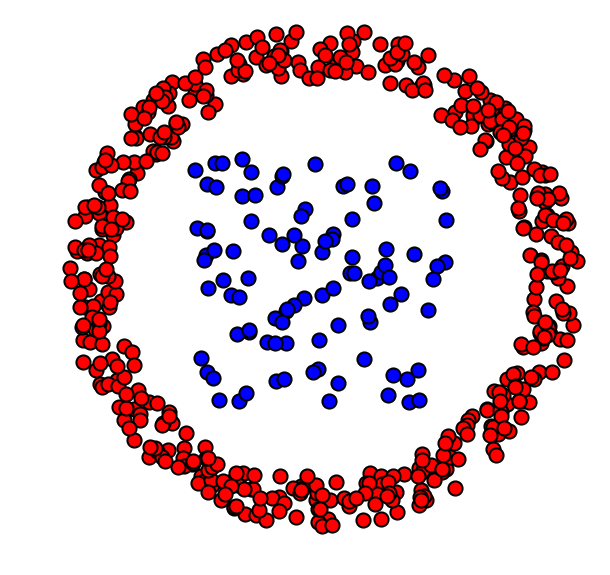

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#Plot again
N=(100, 500)
# Point cloud x, of n points inside a square.
x = np.random.rand(2,N[0])-.5
# Point cloud y, of n points inside an anulus.
theta = 2*np.pi*np.random.rand(1,N[1])
r = .8 + .2*np.random.rand(1,N[1])
y = np.vstack((np.cos(theta)*r,np.sin(theta)*r))
# Shortcut for displaying point clouds.
plotp = lambda x,col: plt.scatter(x[0,:], x[1,:], s=200, edgecolors="k", c=col, linewidths=2)
#Display of the two clouds.
plt.figure(figsize=(10,10))

plotp(x, 'b')
plotp(y, 'r')

plt.axis("off")
plt.xlim(np.min(y[0,:])-.1,np.max(y[0,:])+.1)
plt.ylim(np.min(y[1,:])-.1,np.max(y[1,:])+.1)

plt.show()

In [9]:
# Cost matrix C_{i,j}=\|xi−yj \|^2
x2 = np.sum(x**2,0)
y2 = np.sum(y**2,0)
C = np.tile(y2,(N[0],1)) + np.tile(x2[:,np.newaxis],(1,N[1])) - 2*np.dot(np.transpose(x),y)
# Target histograms (a,b), here uniform histograms.
a = np.ones(N[0])/N[0]
b = np.ones(N[1])/N[1]
# Regularization strength varepsilon>0 
epsilon = .01;
# Gibbs Kernel K
K = np.exp(-C/epsilon)
# Initialization of v=Im (u does not need to be initialized).
v = np.ones(N[1])

#One sinkhorn iterations.
u = a / (np.dot(K,v))
v = b / (np.dot(np.transpose(K),u))

Exercice
Implement Sinkhorn algorithm. Display the evolution of the constraints satisfaction errors
$$ \| 𝑃 \mathbf{1}−𝑎 \|_1 $$
and
$$ \| 𝑃^T \mathbf{1}−𝑏 \|_1 \ .$$
(you need to think about how to compute these residuals from (𝑢,𝑣) alone). isplay the violation of constraint error in log-plot.

Computing time for Brenier map via Sinkhorn's algorithm: 
 233.488083 ms 



/home/petitred/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log
/home/petitred/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log


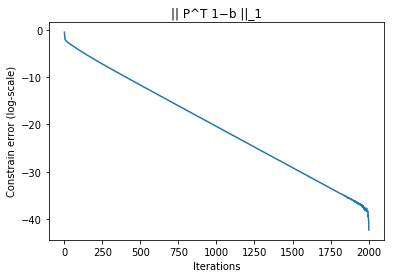

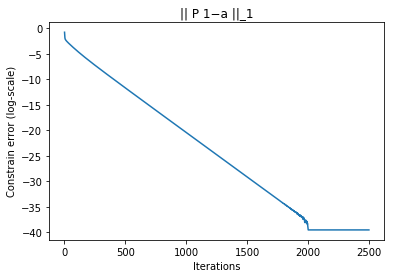

In [10]:
import time
start = time.time()

#Initialize
a = np.ones(N[0])/N[0]
b = np.ones(N[1])/N[1]
epsilon = .01;
K = np.exp(-C/epsilon)

#My solution
iter = 2500
norm_a = np.zeros(iter)
norm_b = np.zeros(iter)
ones = np.ones(N[1])
v = np.ones(N[1])
u = a / (np.dot(K,v))
v = b / (np.dot(np.transpose(K),u))
for i in range(1,iter):
    # Step 1
    u = a / (np.dot(K,v))
    PT1 = v*np.dot( np.transpose(K), u)
    norm_b[i] = np.linalg.norm( PT1-b, 1)
    # Step 2
    v = b / (np.dot(np.transpose(K),u))
    P1 = u*np.dot( K, v)
    norm_a[i] = np.linalg.norm( P1-a, 1)

P = np.dot(np.dot(np.diag(u),K),np.diag(v))
    
end = time.time()
print("Computing time for Brenier map via Sinkhorn's algorithm: \n %f ms \n" % ((end - start)*1000) )

plt.figure()
plt.plot( np.log(norm_b) )
plt.title( "|| P^T 1−b ||_1" )
plt.xlabel('Iterations')
plt.ylabel('Constrain error (log-scale)')

plt.figure()
plt.title( "|| P 1−a ||_1" )
plt.xlabel('Iterations')
plt.ylabel('Constrain error (log-scale)')
plt.plot( np.log(norm_a) )


Keep only the highest entries of the coupling matrix, and use them to draw a map between the two clouds. First we draw "strong" connexions, i.e. links (𝑖,𝑗) corresponding to large values of $𝑃_{𝑖,𝑗}$

We then draw weaker connections.

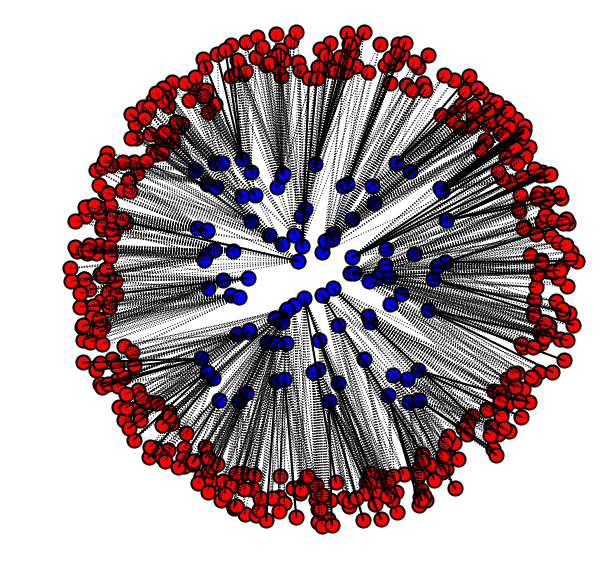

In [11]:
plt.figure(figsize=(10,10))
plotp(x, 'b')
plotp(y, 'r')

# Strong connections in full lines
A = P * (P > np.max(P)*.5)
i,j = np.where(A != 0)
plt.plot([x[0,i],y[0,j]],[x[1,i],y[1,j]],'k',lw = 2)

# Weaker connections in dashed lines
A = P * (P > np.max(P)*.1)
i,j = np.where(A != 0)
plt.plot([x[0,i],y[0,j]],[x[1,i],y[1,j]],'k:',lw = 1)

plt.axis("off")
plt.xlim(np.min(y[0,:])-.1,np.max(y[0,:])+.1)
plt.ylim(np.min(y[1,:])-.1,np.max(y[1,:])+.1)
plt.show()